In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import pickle as pkl
import numpy as np

In [7]:
mapa = gpd.read_file("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/cleandata/miZMVMmap/miZMVM.shp", 
                    encoding = 'latin')

In [19]:
data = pd.read_csv("D:/Edgar Trejo/Universidad/BioMatematica/Modeling COVID-19 Spreading in the ZMVM/data/cleandata/viajes/viajes_entre_semana_por_cve_umun_2017.csv",
                  dtype={'origen':str})

In [21]:
data.set_index('origen', inplace=True)

In [23]:
data_noinnercommuting = data.copy()

for i in range(47):
    data_noinnercommuting.iloc[i, i] = 0

In [59]:
salidas = data.sum(axis = 1)
salidas_noinnercommuting = data_noinnercommuting.sum(axis = 1)

In [64]:
mapa['salidas'] = mapa['cve_umun'].apply(lambda x: salidas[x])

In [71]:
mapa['salidas'] = mapa['salidas'] / mapa['p_total']

In [65]:
mapa['salidas_nic'] = mapa['cve_umun'].apply(lambda x: salidas_noinnercommuting[x])

In [72]:
mapa['salidas_nic'] = mapa['salidas_nic'] / mapa['p_total']

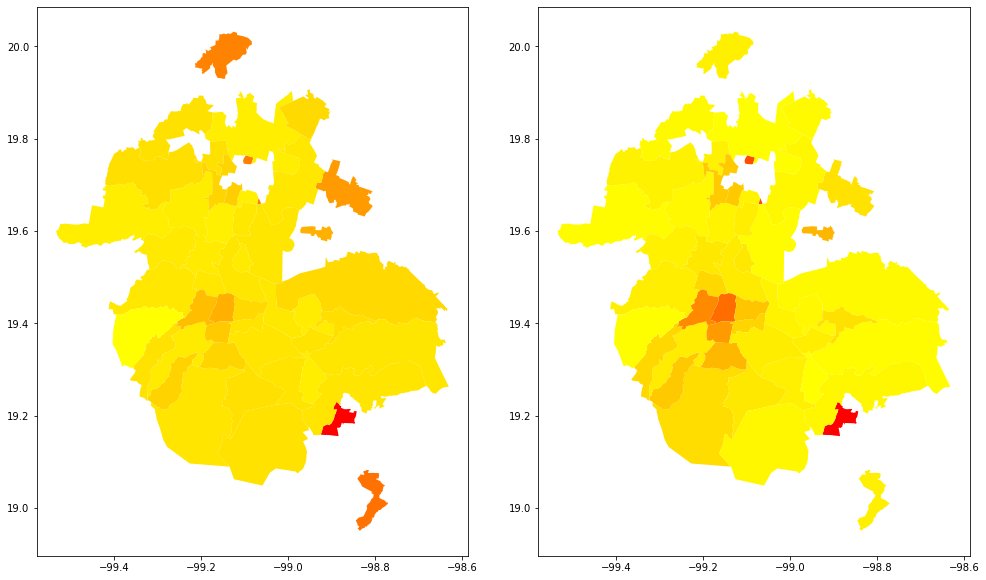

In [75]:
fig, ax = plt.subplots(1, 2, figsize = (14, 8))


mapa.plot(ax = ax[0], column = 'salidas', cmap ="autumn_r")
mapa.plot(ax = ax[1], column = 'salidas_nic', cmap ="autumn_r")



fig.tight_layout(pad = 0.5)
plt.show()